# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
df=pd.read_csv('seeds_dataset.txt', sep="\t", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop([7], axis=1)
y = df[7]
print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*
I would select the standard scaler as it scales to a unit of variance, and PCA looks at variance.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_scaled = scaler.transform(X_train)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [9]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_scaled, y_train)
#print(grid_search.cv_results_.keys())
print("Best Parameters:")
print(grid_search.best_params_)

print("CV scores:")
print(grid_search.cv_results_['split0_test_score'])
print(grid_search.cv_results_['split1_test_score'])
print(grid_search.cv_results_['split2_test_score'])
print(grid_search.cv_results_['split3_test_score'])
print(grid_search.cv_results_['split4_test_score'])

print("Test score:")
print(grid_search.cv_results_['mean_test_score'])

Best Parameters:
{'C': 10.0, 'fit_intercept': True}
CV scores:
[0.875   0.84375 0.875   0.84375 0.875   0.875   0.875   0.875  ]
[0.9375  0.8125  0.9375  0.90625 0.9375  0.90625 0.90625 0.9375 ]
[0.96774194 0.93548387 0.93548387 0.96774194 0.93548387 0.96774194
 0.96774194 0.93548387]
[1.         0.96774194 1.         1.         1.         1.
 1.         1.        ]
[0.80645161 0.77419355 0.87096774 0.77419355 0.90322581 0.83870968
 0.93548387 0.90322581]
Test score:
[0.91733871 0.86673387 0.92379032 0.8983871  0.93024194 0.91754032
 0.93689516 0.93024194]


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TODO: Predict y labels using best estimator
new_model = LogisticRegression(C=10, fit_intercept=True, random_state=0).fit(X_scaled, y_train)
y_labels = new_model.predict(X_test)

In [11]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
import mglearn
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (157, 7)
Reduced shape: (157, 2)


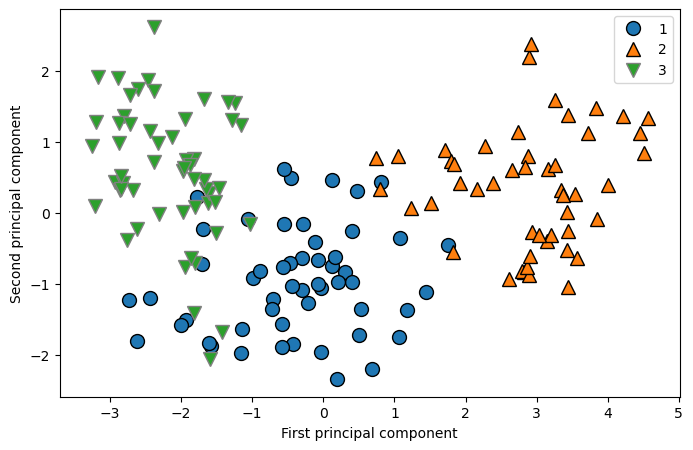

In [12]:
# TODO: Plot test points colored by predicted label
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train)
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Yes, the model is good, the CV scores are very close to 1.0 for all the different folds.
1. Yes, PCA looks to work well as the plot shows fairly distinct groupings for the different labels. These good results suggest that the dataset is likely linear as the logistic regression model and PCA performed well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I got my code mostly from the notes, with some of it coming from the lab.
1. I completed all the steps in order (from top to bottom).
1. I did not use any AI for this assignment.
1. I had some issues when first importing the data, and then again with getting the scaler to play nice. Eventually I found some code in the notes that was similar and adapted that.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [18]:
# TODO: Scale feature matrix
df=pd.read_csv('seeds_dataset.txt', sep="\t", header=None)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

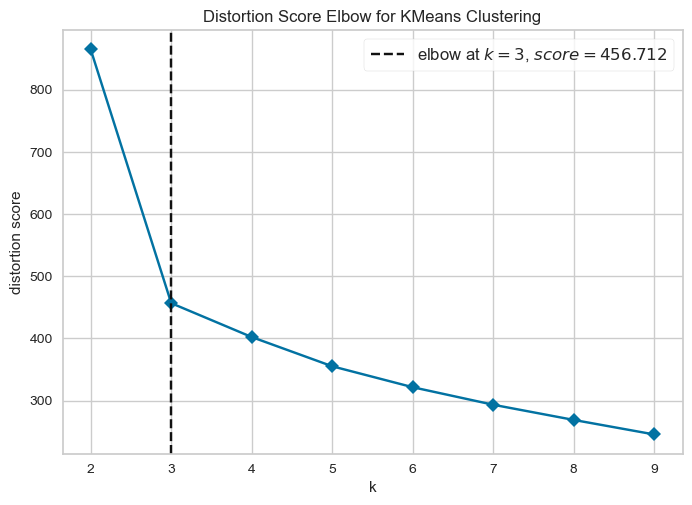

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 timings=False)

In [19]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=0), df_scaled, k=(2, 10), metric='distortion', timings=False)


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [20]:
# TODO: Implement K-means with the number of clusters determined in the previous step
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_scaled)

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score

sils = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    sils.append(silhouette_score(X_scaled, kmeans.labels_ ))
print("Silhouette Score:")
print(sils)

from sklearn.metrics import calinski_harabasz_score

chs = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    chs.append(calinski_harabasz_score(X_scaled, kmeans.labels_ ))
print("Calinski-Harabasz Score:")
print(chs)

from sklearn.metrics import davies_bouldin_score

dbs = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    dbs.append(davies_bouldin_score(X_scaled, kmeans.labels_ ))
print("Davies-Bouldin Score:")
print(dbs)

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Silhouette Score:
[0.46577247686580914, 0.4007270552751298, 0.32757426605518075, 0.28767815606866765, 0.28938653691553723, 0.2813054609054565, 0.25457164791410447, 0.2472613009223194, 0.25869479575683585, 0.2635897474150771, 0.2580709132078087, 0.2637003668650615]


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Calinski-Harabasz Score:
[255.85482678628833, 249.78417491616472, 203.18771540485884, 178.74938800107796, 166.2806535655365, 155.41897744767567, 147.09727613634814, 138.58917664418635, 134.80754508307618, 133.6828796456579, 127.15432355383457, 124.44975063396025]


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Davies-Bouldin Score:
[0.7968788694686014, 0.9278712249013426, 1.06261546298054, 1.1846788146376899, 1.1080455000352585, 1.1515856086388645, 1.2080496433977688, 1.2423111070403179, 1.164527693060854, 1.116114118093221, 1.1410941741137741, 1.1028174738020635]


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

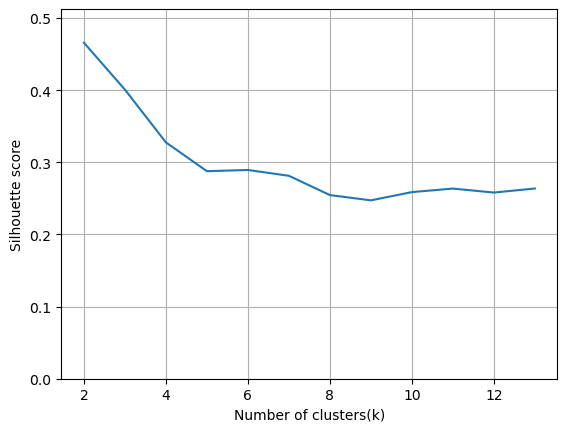

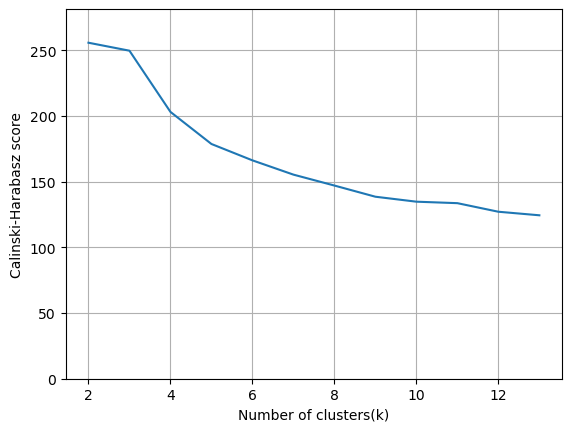

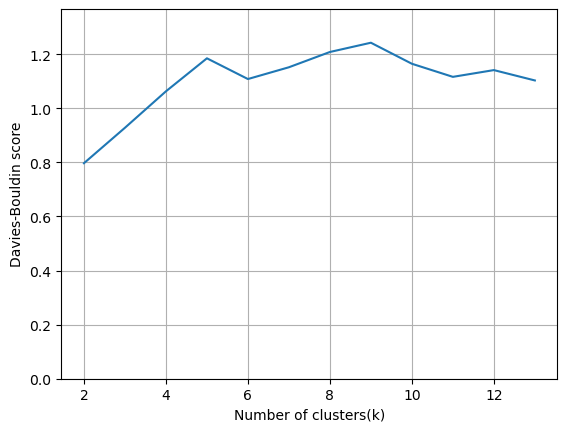

In [42]:
# TODO: Plot clustering results
df_sils = pd.DataFrame({'n_clusters': n_clusters_list, 'silhouette': sils})
ax = df_sils.plot(x='n_clusters', y='silhouette')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * df_sils.silhouette.max()))
plt.grid(True)
ax.legend().set_visible(False)

df_chs = pd.DataFrame({'n_clusters': n_clusters_list, 'calinski_harabasz': chs})
ax = df_chs.plot(x='n_clusters', y='calinski_harabasz')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Calinski-Harabasz score')
plt.ylim((0, 1.1 * df_chs.calinski_harabasz.max()))
plt.grid(True)
ax.legend().set_visible(False)

df_dbs = pd.DataFrame({'n_clusters': n_clusters_list, 'davies_bouldin': dbs})
ax = df_dbs.plot(x='n_clusters', y='davies_bouldin')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Davies-Bouldin score')
plt.ylim((0, 1.1 * df_dbs.davies_bouldin.max()))
plt.grid(True)
ax.legend().set_visible(False)

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

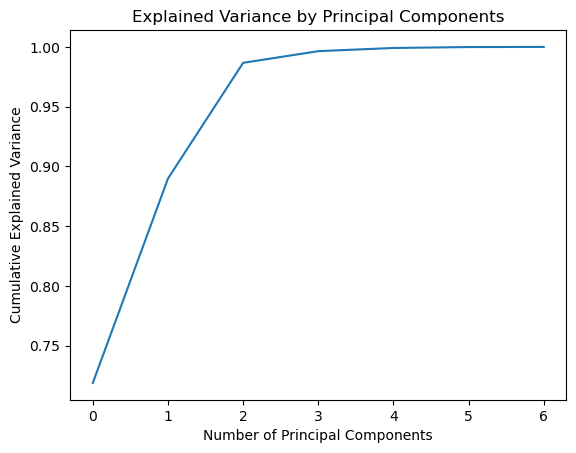

In [43]:
# TODO: Find the number of principal components using explained variance ratio
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [44]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [45]:
# TODO: Implement K-means with the transformed data
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_scaled)

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score

sils = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    sils.append(silhouette_score(X_scaled, kmeans.labels_ ))
print("Silhouette Score:")
print(sils)

from sklearn.metrics import calinski_harabasz_score

chs = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    chs.append(calinski_harabasz_score(X_scaled, kmeans.labels_ ))
print("Calinski-Harabasz Score:")
print(chs)

from sklearn.metrics import davies_bouldin_score

dbs = []
n_clusters_list = range(2, 14)

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_scaled)
    dbs.append(davies_bouldin_score(X_scaled, kmeans.labels_ ))
print("Davies-Bouldin Score:")
print(dbs)

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Silhouette Score:
[0.46577247686580914, 0.4007270552751298, 0.32757426605518075, 0.28767815606866765, 0.28938653691553723, 0.2813054609054565, 0.25457164791410447, 0.2472613009223194, 0.25869479575683585, 0.2635897474150771, 0.2580709132078087, 0.2637003668650615]


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Calinski-Harabasz Score:
[255.85482678628833, 249.78417491616472, 203.18771540485884, 178.74938800107796, 166.2806535655365, 155.41897744767567, 147.09727613634814, 138.58917664418635, 134.80754508307618, 133.6828796456579, 127.15432355383457, 124.44975063396025]


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

Davies-Bouldin Score:
[0.7968788694686014, 0.9278712249013426, 1.06261546298054, 1.1846788146376899, 1.1080455000352585, 1.1515856086388645, 1.2080496433977688, 1.2423111070403179, 1.164527693060854, 1.116114118093221, 1.1410941741137741, 1.1028174738020635]


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

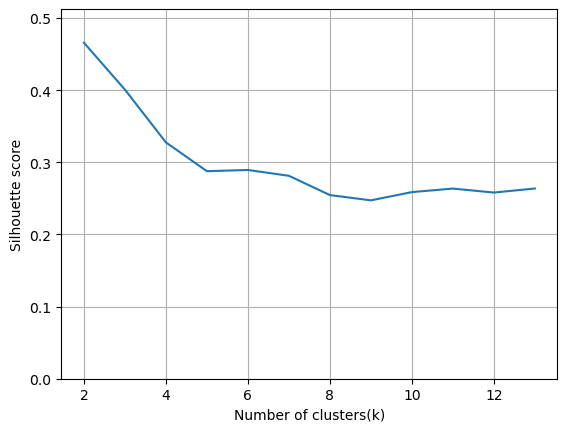

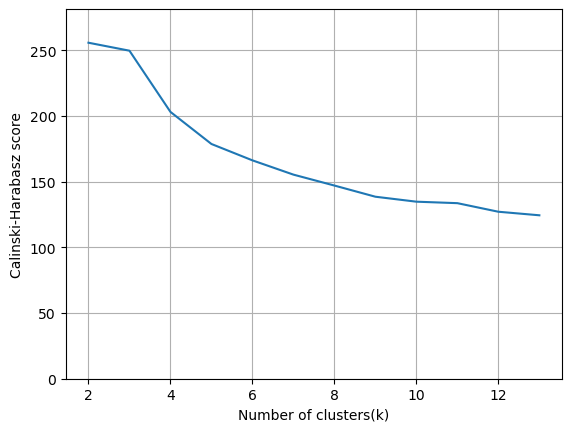

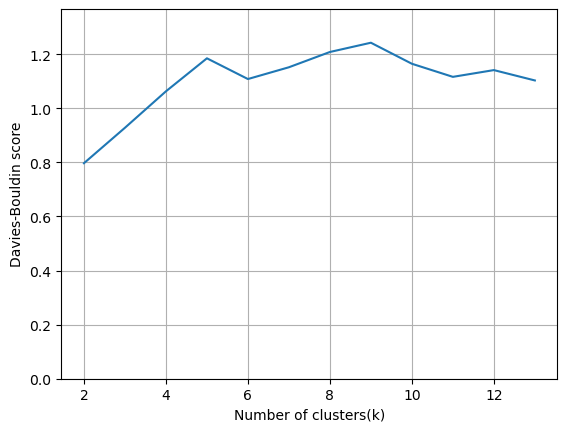

In [47]:
# TODO: Display results
df_sils = pd.DataFrame({'n_clusters': n_clusters_list, 'silhouette': sils})
ax = df_sils.plot(x='n_clusters', y='silhouette')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * df_sils.silhouette.max()))
plt.grid(True)
ax.legend().set_visible(False)

df_chs = pd.DataFrame({'n_clusters': n_clusters_list, 'calinski_harabasz': chs})
ax = df_chs.plot(x='n_clusters', y='calinski_harabasz')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Calinski-Harabasz score')
plt.ylim((0, 1.1 * df_chs.calinski_harabasz.max()))
plt.grid(True)
ax.legend().set_visible(False)

df_dbs = pd.DataFrame({'n_clusters': n_clusters_list, 'davies_bouldin': dbs})
ax = df_dbs.plot(x='n_clusters', y='davies_bouldin')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Davies-Bouldin score')
plt.ylim((0, 1.1 * df_dbs.davies_bouldin.max()))
plt.grid(True)
ax.legend().set_visible(False)

#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. Yes, the dataset from part one showed three clusters, and three labels, so having 3 makes the most sense.
1. Yes, the plots are pretty similar for parts one and two.
1. I used two components, which from the plot should explain ~96% of the variance. The jump to three components increases the explained variance to about 100%, but I think two is sufficient. Yes, PCA improved the results since the reduction of dimensions helps with clustering.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The code mostly came from the lab, with some coming from the class examples
1. I completed all the steps in order.
1. I did not use any AI for this assignment.
1. I'm overall not as knowledgeable about these final topics as I was the other course content due to my focus being on other classes. I was trying to follow along with the course notes but did not always know what I was doing.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
Overall I liked the assignment as it gave some practice with new ML techniques, but I need to study these a lot before the final. I found the PCA aspects difficult as I don't fully understand it yet.